In [1]:
# 数据集图片在文件夹中的处理

# 与之前不同的是，此处采用创建一个较小的数据集，共4000张。
#  猫狗各有2000张，我们将用2000张图片训练模型，1000张用来校验模型，最后1000张对模型进行测试
# batch_size由150减少至20,
import os, shutil
#数据包被解压的路径
original_dataset_dir = "C:/Users/hh/Desktop/Kaggle/2.0 CatdogNet/input/train"
#构造一个专门用于存储图片的路径
base_dir = "C:/Users/hh/Desktop/Kaggle/2.0 CatdogNet/input/train3"
os.makedirs(base_dir, exist_ok=True)
#构造路径存储训练数据，校验数据以及测试数据
train_dir = os.path.join(base_dir, "train")
os.makedirs(train_dir, exist_ok = True)
test_dir = os.path.join(base_dir, "test")
os.makedirs(test_dir, exist_ok = True)
validation_dir = os.path.join(base_dir, "validation")
os.makedirs(validation_dir, exist_ok = True)

#构造专门存储猫图片的路径，用于训练网络
train_cats_dir = os.path.join(train_dir, "cats")
os.makedirs(train_cats_dir, exist_ok = True)
#构造存储狗图片路径，用于训练网络
train_dogs_dir = os.path.join(train_dir, "dogs")
os.makedirs(train_dogs_dir, exist_ok = True)

#构造存储猫图片的路径，用于校验网络
validation_cats_dir = os.path.join(validation_dir, "cats")
os.makedirs(validation_cats_dir, exist_ok = True)
#构造存储狗图片的路径，用于校验网络
validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.makedirs(validation_dogs_dir, exist_ok = True)

#构造存储猫图片路径，用于测试网络
test_cats_dir = os.path.join(test_dir, "cats")
os.makedirs(test_cats_dir, exist_ok = True)
#构造存储狗图片路径，用于测试网络
test_dogs_dir = os.path.join(test_dir, "dogs")
os.makedirs(test_dogs_dir, exist_ok = True)



#把前1000张猫图片复制到训练路径
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#把接着的500张猫图片复制到校验路径
fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#把接着的500张猫图片复制到测试路径
fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

#把1000张狗图片复制到训练路径
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#把接下500张狗图片复制到校验路径
fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#把接下来500张狗图片复制到测试路径
fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    
print("total trainning cat images: ", len(os.listdir(train_cats_dir)))

print("total training dog images", len(os.listdir(train_dogs_dir)))

print("total validation cat images", len(os.listdir(validation_cats_dir)))

print("total validation dogs images", len(os.listdir(validation_dogs_dir)))

print("total test cat images:", len(os.listdir(test_cats_dir)))

print("total test dog images:", len(os.listdir(test_dogs_dir)))

total trainning cat images:  1000
total training dog images 1000
total validation cat images 500
total validation dogs images 500
total test cat images: 500
total test dog images: 500


In [2]:
#构造模型
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
# 输入图片大小是150*150*3,3表示的是图像像素用（R/G/B表示）
model.add(layers.Conv2D(32,(3,3),activation = "relu",input_shape = (150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation = "relu"))
model.add(layers.Dense(1,activation = "sigmoid"))
          
model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(lr = 0.0001),
             metrics = ["acc"])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
# 数据预处理
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

#generator 实际上是将数据批量读入内存，使得代码能以for in 的方式去方便的访问
train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150),batch_size = 20, 
                                                   class_mode = "binary")
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size = (150,150),batch_size = 20,
                                                       class_mode = "binary")
#calss_mode 让每张读入的图片对应一个标签值，我们上面一下子读入20片，因此还附带着一个数组(20 )
#标签数组的具体值没有设定，由我们后面去使用
for data_batch,labels_batch in train_generator:
    print("data batch shape", data_batch.shape)
    print("labels batch shape", labels_batch.shape)
    break

"""
Generator 是一种数据批量读取器，而且他们是可循环的，也就是可以对它们使用for in ，
在上面我们构造了两个Generator用于读取训练图片和校验图片，同时把图片大小设置为150*150,
同时它还能让我们在图片后面附带一个标签值，这就是参数class_mode的作用，
由于我们只有猫狗两种图片，因此该标签值不是0就是1，由于train_dir路径下只有两个文件夹，
它会为从这两个文件夹中读取的图片分别赋值0和1。

在用for in 遍历generator时，每次遍历都能读取20张图片，而且这个过程是无止境的，
当所有图片读取完后，generator又会重头再次读入图片，因此我们必须自己使用break把循环中断掉
"""

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape (20, 150, 150, 3)
labels batch shape (20,)


'\nGenerator 是一种数据批量读取类，而且他们是可循环的，也就是可以对它们使用for in ，\n在上面我们构造了两个Generator用于读取训练图片和校验图片，同时把图片大小设置为150*150,\n同时它还能让我们在图片后面附带一个标签值，这就是参数class_mode的作用，\n由于我们只有猫狗两种图片，因此该标签值不是0就是1，由于train_dir路径下只有两个文件夹，\n它会为从这两个文件夹中读取的图片分别赋值0和1。\n\n在用for in 遍历generator时，每次遍历都能读取20张图片，而且这个过程是无止境的，\n当所有图片读取完后，generator又会重头再次读入图片，因此我们必须自己使用break把循环中断掉\n'

In [4]:
# 通过generator把数据高效的传递给网络
history = model.fit_generator(train_generator,steps_per_epoch = 100, epochs = 30, 
                              validation_data = validation_generator, validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 85s 848ms/step - loss: 0.6940 - acc: 0.5225 - val_loss: 0.6801 - val_acc: 0.5350
Epoch 2/30
100/100 [==============================] - 79s 795ms/step - loss: 0.6652 - acc: 0.6025 - val_loss: 0.6537 - val_acc: 0.6170
Epoch 3/30
100/100 [==============================] - 79s 793ms/step - loss: 0.6250 - acc: 0.6520 - val_loss: 0.7275 - val_acc: 0.5600
Epoch 4/30
100/100 [==============================] - 79s 793ms/step - loss: 0.5830 - acc: 0.6885 - val_loss: 0.6120 - val_acc: 0.6560
Epoch 5/30
100/100 [==============================] - 79s 794ms/step - loss: 0.5472 - acc: 0.7230 - val_loss: 0.6252 - val_acc: 0.6490
Epoch 6/30
100/100 [==============================] - 79s 794ms/step - loss: 0.5130 - acc: 0.7530 - val_loss: 0.5912 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 79s 792ms/step - loss: 0.4814 - acc: 0.7735 - val_loss: 0.5906 - val_acc: 0.6780
Epoch 8/30
100/100 [==============================] - 8

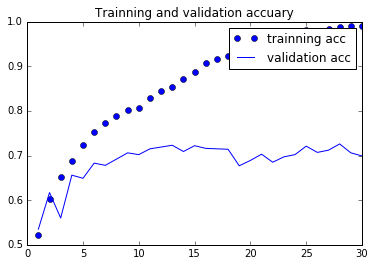

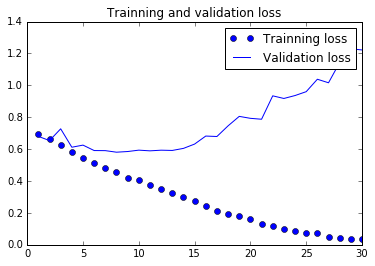

In [5]:
# 将模型的训练准确率和验证集准确率绘制出来，查看模型对数据的处理情况
# model.save("cats_and_dogs_small_1.h5")
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

#绘制模型对训练数据和校验数据判断的准确率
plt.plot(epochs, acc, "bo", label = "trainning acc")
plt.plot(epochs, val_acc, "b", label = "validation acc")
plt.title("Trainning and validation accuary")
plt.legend()

plt.show()
plt.figure()

#绘制模型对训练数据和校验数据判断的错误率
plt.plot(epochs, loss, "bo", label = "Trainning loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Trainning and validation loss")
plt.legend()

plt.show()

In [6]:
# 绘制曲线后会发现出现过拟合问题，解决问题的方法之一就是增加数据量，即可以在keras框架内进行数据扩展

datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                            shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = "nearest")

"""
rotation_range表示对图片进行旋转变化， width_shift 和 height_shift对图片的宽和高进行拉伸，
shear_range指定裁剪变化的程度，zoom_range是对图片进行放大缩小，
horizaontal_flip将图片在水平方向上翻转，fill_mode表示当图片进行变换后产生多余空间时，如何去填充

"""

'\nrotation_range表示对图片进行旋转变化， width_shift 和 height_shift对图片的宽和高进行拉伸，\nshear_range指定裁剪变化的程度，zoom_range是对图片进行放大缩小，\nhorizaontal_flip将图片在水平方向上翻转，fill_mode表示当图片进行变换后产生多余空间时，如何去填充\n\n'

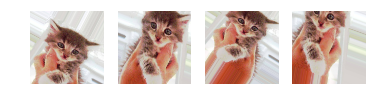

In [7]:
# 查看把上面变化用到一张具体图片上是什么情况
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
#选择一张猫的照片
img_path = fnames[3]
#加载图片并把它设置为150*150
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

i = 0
'''
下面的flow函数能自动帮我们进行指定的各种图形变换，例如拉伸，缩放，裁剪等，它是一个死循环，
我们需要自己通过break命令才能跳出来
'''
f, ax = plt.subplots(1,4)
for batch in datagen.flow(x, batch_size = 1):
    imgplot = ax[i].imshow(image.array_to_img(batch[0]))
    ax[i].axis('off')
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [16]:
# 通过扩充数据集和Dropout结合，重新训练网络：
# 从上面可以看到，我们从一张图片就可以通过变换生成好几张不同图片，我们在把图片传入网络前，
# 先通过上面办法扩张图片，那么网络一下子就能获得成倍增长的训练数据，
# 然而这种做法使得新生成的图片与原有图片存在很强的关联性，
# 因此它对改善过度拟合的作用比较有限，因此我们还得运用前面说过的对网络层输出结果随机清零的办法，
# 我们把这两方法结合起来重新训练网络

model = models.Sequential()
#输入图片大小是150*150 3表示图片像素用(R,G,B)表示
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150 , 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
#  把上层网络的输出结果的一般数据随机清零
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [17]:
train_datagen = ImageDataGenerator(rescale = 1. / 255, rotation_range = 40, width_shift_range = 0.2, 
                                  height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, 
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

# generator 实际上是将数据批量读入内存，使得代码能以for in 的方式去方便的访问
train_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150),batch_size = 20, 
                                                   class_mode = "binary")
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size = (150,150),batch_size = 20,
                                                       class_mode = "binary")
for data_batch,labels_batch in train_generator:
    print("data batch shape", data_batch.shape)
    print("labels batch shape", labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape (20, 150, 150, 3)
labels batch shape (20,)


In [18]:
# 运行扩增数据集和使用Dropout后的网络，查看效果
history = model.fit_generator(train_generator,steps_per_epoch = 100, epochs = 30, 
                              validation_data = validation_generator, validation_steps = 50)
model.save("cats_and_dogs_small_2.h5")

"""
1. 理论上，经过数据扩展和输出结果随机清零后，对过度拟合的处理非常有效，从上图看，
网络对训练数据和校验数据的识别正确率最终完全一致，对两类数据的识别错误率都在有序下降。
此时我们达到了80%左右的准确率。如果进一步使用数据正规化以及参数调优等手段，网络的识别率还能进一步提升

"""


Epoch 1/30
100/100 [==============================] - 84s 841ms/step - loss: 0.6963 - acc: 0.4960 - val_loss: 0.6915 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 81s 813ms/step - loss: 0.6916 - acc: 0.5225 - val_loss: 0.6812 - val_acc: 0.5660
Epoch 3/30
100/100 [==============================] - 82s 815ms/step - loss: 0.6821 - acc: 0.5755 - val_loss: 0.6603 - val_acc: 0.6040
Epoch 4/30
100/100 [==============================] - 82s 816ms/step - loss: 0.6698 - acc: 0.6015 - val_loss: 0.6494 - val_acc: 0.6130
Epoch 5/30
100/100 [==============================] - 81s 814ms/step - loss: 0.6671 - acc: 0.5960 - val_loss: 0.6445 - val_acc: 0.6200
Epoch 6/30
100/100 [==============================] - 82s 815ms/step - loss: 0.6587 - acc: 0.6070 - val_loss: 0.6436 - val_acc: 0.6180
Epoch 7/30
100/100 [==============================] - 82s 815ms/step - loss: 0.6505 - acc: 0.6185 - val_loss: 0.6193 - val_acc: 0.6540
Epoch 8/30
100/100 [==============================] - 8

'\n1. 理论上，经过数据扩展和输出结果随机清零后，对过度拟合的处理非常有效，从上图看，\n网络对训练数据和校验数据的识别正确率最终完全一致，对两类数据的识别错误率都在有序下降。\n此时我们达到了80%左右的准确率。如果进一步使用数据正规化以及参数调优等手段，网络的识别率还能进一步提升\n\n'

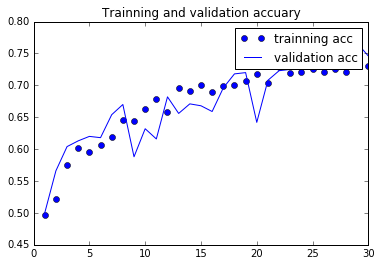

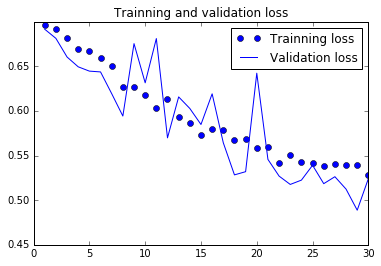

In [19]:
# 将模型的训练准确率和验证集准确率绘制出来，查看模型对数据的处理情况
# model.save("cats_and_dogs_small_1.h5")
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

#绘制模型对训练数据和校验数据判断的准确率
plt.plot(epochs, acc, "bo", label = "trainning acc")
plt.plot(epochs, val_acc, "b", label = "validation acc")
plt.title("Trainning and validation accuary")
plt.legend()

plt.show()
plt.figure()

#绘制模型对训练数据和校验数据判断的错误率
plt.plot(epochs, loss, "bo", label = "Trainning loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Trainning and validation loss")
plt.legend()

plt.show()

In [ ]:
#   link    https://blog.csdn.net/tyler_download/article/details/81170962